In [677]:
# import libraries
# import csv
# explore the csv file
# heatmap for correlation
# model development
# prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
df=pd.read_csv('car_data.csv')

In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Suzuki ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Suzuki sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Suzuki ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Suzuki wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Suzuki swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,Honda brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,Honda city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,Honda city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
df.rename(columns={'Selling_Price':'Selling_Price USD','Present_Price':'Present_Price USD'},inplace=True)

In [9]:
df.rename(columns={'Selling_type':'Selling_Type','Owner':'Previous_Owner'},inplace=True)

In [10]:
df

,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner
0,Suzuki ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Suzuki sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Suzuki ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Suzuki wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Suzuki swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,Honda brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,Honda city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,Honda city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           301 non-null    object 
 1   Year               301 non-null    int64  
 2   Selling_Price USD  301 non-null    float64
 3   Present_Price USD  301 non-null    float64
 4   Driven_kms         301 non-null    int64  
 5   Fuel_Type          301 non-null    object 
 6   Selling_Type       301 non-null    object 
 7   Transmission       301 non-null    object 
 8   Previous_Owner     301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.describe()

,Year,Selling_Price USD,Present_Price USD,Driven_kms,Previous_Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Selling_Price USD', ylabel='count'>

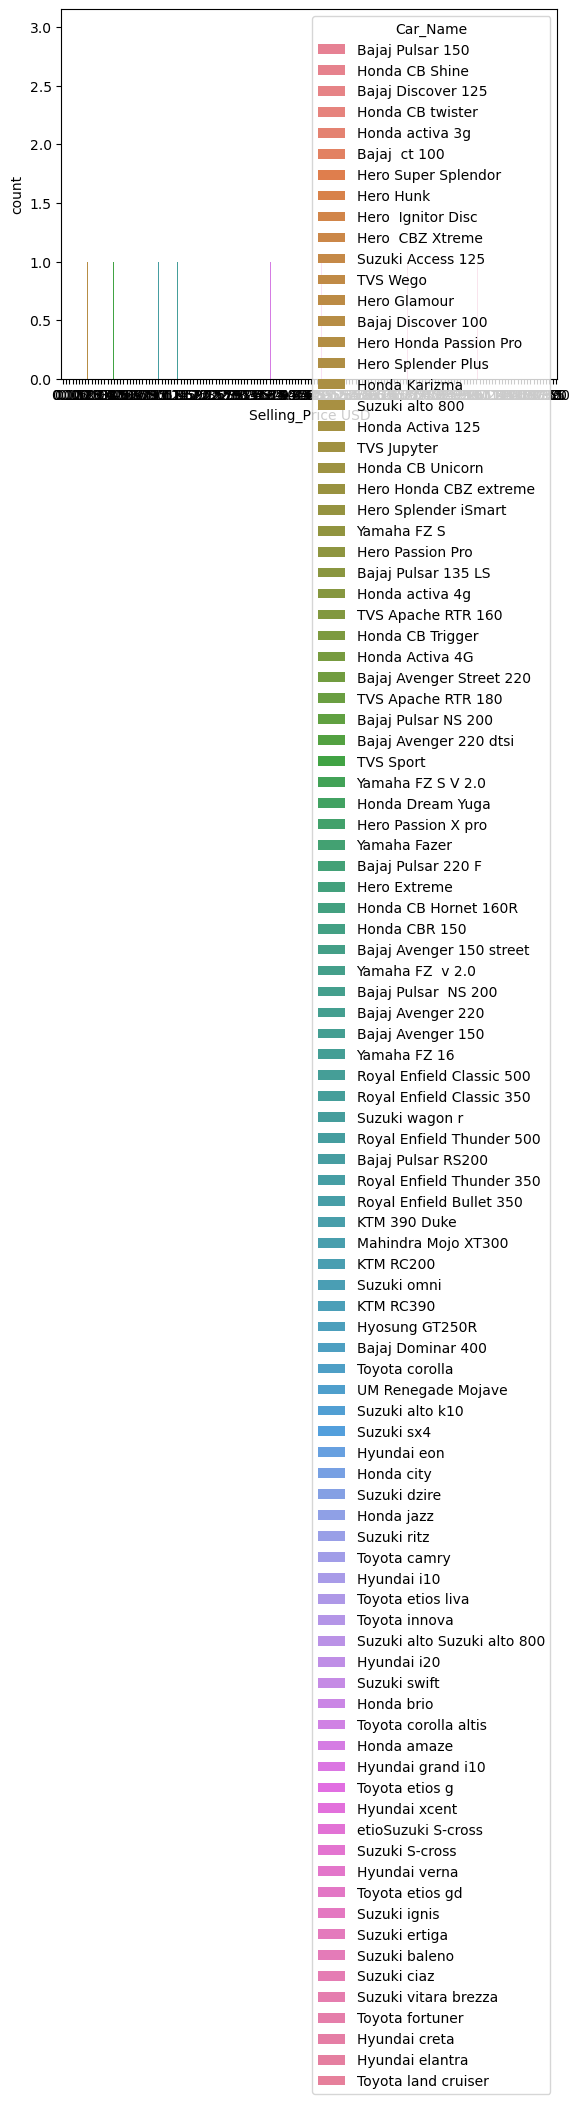

In [14]:
sns.countplot(x=df['Selling_Price USD'],hue=df['Car_Name'])

In [15]:
df

,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner
0,Suzuki ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Suzuki sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Suzuki ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Suzuki wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Suzuki swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,Honda brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,Honda city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,Honda city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [16]:
df['Present_Price USD']=df['Present_Price USD']*1000
df['Selling_Price USD']=df['Selling_Price USD']*1000

In [17]:
df

,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner
0,Suzuki ritz,2014,3350.0,5590.0,27000,Petrol,Dealer,Manual,0
1,Suzuki sx4,2013,4750.0,9540.0,43000,Diesel,Dealer,Manual,0
2,Suzuki ciaz,2017,7250.0,9850.0,6900,Petrol,Dealer,Manual,0
3,Suzuki wagon r,2011,2850.0,4150.0,5200,Petrol,Dealer,Manual,0
4,Suzuki swift,2014,4600.0,6870.0,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9500.0,11600.0,33988,Diesel,Dealer,Manual,0
297,Honda brio,2015,4000.0,5900.0,60000,Petrol,Dealer,Manual,0
298,Honda city,2009,3350.0,11000.0,87934,Petrol,Dealer,Manual,0
299,Honda city,2017,11500.0,12500.0,9000,Diesel,Dealer,Manual,0


In [18]:
df['Depreciation']=df['Present_Price USD'] - df['Selling_Price USD']
df['Depreciation']=df['Depreciation'].astype(int)
df

,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation
0,Suzuki ritz,2014,3350.0,5590.0,27000,Petrol,Dealer,Manual,0,2240
1,Suzuki sx4,2013,4750.0,9540.0,43000,Diesel,Dealer,Manual,0,4790
2,Suzuki ciaz,2017,7250.0,9850.0,6900,Petrol,Dealer,Manual,0,2600
3,Suzuki wagon r,2011,2850.0,4150.0,5200,Petrol,Dealer,Manual,0,1300
4,Suzuki swift,2014,4600.0,6870.0,42450,Diesel,Dealer,Manual,0,2270
...,...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9500.0,11600.0,33988,Diesel,Dealer,Manual,0,2100
297,Honda brio,2015,4000.0,5900.0,60000,Petrol,Dealer,Manual,0,1900
298,Honda city,2009,3350.0,11000.0,87934,Petrol,Dealer,Manual,0,7650
299,Honda city,2017,11500.0,12500.0,9000,Diesel,Dealer,Manual,0,1000


In [19]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [20]:
df['Selling_Type'].value_counts()

Selling_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [21]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [22]:
df['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)
df['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)
df['Selling_Type'].replace({'Dealer':0,'Individual':1},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5384\1299827492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5384\1299827492.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel

In [23]:
df.isnull().sum()

Car_Name             0
Year                 0
Selling_Price USD    0
Present_Price USD    0
Driven_kms           0
Fuel_Type            0
Selling_Type         0
Transmission         0
Previous_Owner       0
Depreciation         0
dtype: int64

In [24]:
df

,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation
0,Suzuki ritz,2014,3350.0,5590.0,27000,0,0,0,0,2240
1,Suzuki sx4,2013,4750.0,9540.0,43000,1,0,0,0,4790
2,Suzuki ciaz,2017,7250.0,9850.0,6900,0,0,0,0,2600
3,Suzuki wagon r,2011,2850.0,4150.0,5200,0,0,0,0,1300
4,Suzuki swift,2014,4600.0,6870.0,42450,1,0,0,0,2270
...,...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9500.0,11600.0,33988,1,0,0,0,2100
297,Honda brio,2015,4000.0,5900.0,60000,0,0,0,0,1900
298,Honda city,2009,3350.0,11000.0,87934,0,0,0,0,7650
299,Honda city,2017,11500.0,12500.0,9000,1,0,0,0,1000


In [25]:
df.dtypes

Car_Name              object
Year                   int64
Selling_Price USD    float64
Present_Price USD    float64
Driven_kms             int64
Fuel_Type              int64
Selling_Type           int64
Transmission           int64
Previous_Owner         int64
Depreciation           int32
dtype: object

In [26]:
def brandfx(car):
    carbrand=car.split(' ')[0]
    return carbrand

In [27]:
brandfx('Suzuki ritz')

'Suzuki'

In [28]:
df['Brand']=df['Car_Name'].apply(brandfx)

In [29]:
df

,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation,Brand
0,Suzuki ritz,2014,3350.0,5590.0,27000,0,0,0,0,2240,Suzuki
1,Suzuki sx4,2013,4750.0,9540.0,43000,1,0,0,0,4790,Suzuki
2,Suzuki ciaz,2017,7250.0,9850.0,6900,0,0,0,0,2600,Suzuki
3,Suzuki wagon r,2011,2850.0,4150.0,5200,0,0,0,0,1300,Suzuki
4,Suzuki swift,2014,4600.0,6870.0,42450,1,0,0,0,2270,Suzuki
...,...,...,...,...,...,...,...,...,...,...,...
296,Honda city,2016,9500.0,11600.0,33988,1,0,0,0,2100,Honda
297,Honda brio,2015,4000.0,5900.0,60000,0,0,0,0,1900,Honda
298,Honda city,2009,3350.0,11000.0,87934,0,0,0,0,7650,Honda
299,Honda city,2017,11500.0,12500.0,9000,1,0,0,0,1000,Honda


In [30]:
df=df[['Brand','Car_Name','Year','Selling_Price USD','Present_Price USD','Driven_kms','Fuel_Type','Selling_Type','Transmission','Previous_Owner','Depreciation']]

In [31]:
df

,Brand,Car_Name,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation
0,Suzuki,Suzuki ritz,2014,3350.0,5590.0,27000,0,0,0,0,2240
1,Suzuki,Suzuki sx4,2013,4750.0,9540.0,43000,1,0,0,0,4790
2,Suzuki,Suzuki ciaz,2017,7250.0,9850.0,6900,0,0,0,0,2600
3,Suzuki,Suzuki wagon r,2011,2850.0,4150.0,5200,0,0,0,0,1300
4,Suzuki,Suzuki swift,2014,4600.0,6870.0,42450,1,0,0,0,2270
...,...,...,...,...,...,...,...,...,...,...,...
296,Honda,Honda city,2016,9500.0,11600.0,33988,1,0,0,0,2100
297,Honda,Honda brio,2015,4000.0,5900.0,60000,0,0,0,0,1900
298,Honda,Honda city,2009,3350.0,11000.0,87934,0,0,0,0,7650
299,Honda,Honda city,2017,11500.0,12500.0,9000,1,0,0,0,1000


In [32]:
df3=df.drop('Car_Name',axis=1)

In [33]:
df3

,Brand,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation
0,Suzuki,2014,3350.0,5590.0,27000,0,0,0,0,2240
1,Suzuki,2013,4750.0,9540.0,43000,1,0,0,0,4790
2,Suzuki,2017,7250.0,9850.0,6900,0,0,0,0,2600
3,Suzuki,2011,2850.0,4150.0,5200,0,0,0,0,1300
4,Suzuki,2014,4600.0,6870.0,42450,1,0,0,0,2270
...,...,...,...,...,...,...,...,...,...,...
296,Honda,2016,9500.0,11600.0,33988,1,0,0,0,2100
297,Honda,2015,4000.0,5900.0,60000,0,0,0,0,1900
298,Honda,2009,3350.0,11000.0,87934,0,0,0,0,7650
299,Honda,2017,11500.0,12500.0,9000,1,0,0,0,1000


In [34]:
df3.Brand.unique()

array(['Suzuki', 'Toyota', 'etioSuzuki', 'Royal', 'UM', 'KTM', 'Bajaj',
       'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero', 'Hyundai'],
      dtype=object)

In [35]:
df3['Brand'].replace({'Suzuki':1,'Toyota':2,'Royal':3,'UM':4,'KTM':5,'Bajaj':6,'Hyosung':7,'Mahindra':8,'Honda':9,'Yamaha':10,'TVS':11,'Hero':12,'Hyundai':13},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5384\3605288762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Brand'].replace({'Suzuki':1,'Toyota':2,'Royal':3,'UM':4,'KTM':5,'Bajaj':6,'Hyosung':7,'Mahindra':8,'Honda':9,'Yamaha':10,'TVS':11,'Hero':12,'Hyundai':13},inplace=True)


In [46]:
df3['Brand'].replace({'etioSuzuki':1},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5384\2621602015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Brand'].replace({'etioSuzuki':1},inplace=True)


In [48]:
df3

,Brand,Year,Selling_Price USD,Present_Price USD,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation
0,1,2014,3350.0,5590.0,27000,0,0,0,0,2240
1,1,2013,4750.0,9540.0,43000,1,0,0,0,4790
2,1,2017,7250.0,9850.0,6900,0,0,0,0,2600
3,1,2011,2850.0,4150.0,5200,0,0,0,0,1300
4,1,2014,4600.0,6870.0,42450,1,0,0,0,2270
...,...,...,...,...,...,...,...,...,...,...
296,9,2016,9500.0,11600.0,33988,1,0,0,0,2100
297,9,2015,4000.0,5900.0,60000,0,0,0,0,1900
298,9,2009,3350.0,11000.0,87934,0,0,0,0,7650
299,9,2017,11500.0,12500.0,9000,1,0,0,0,1000


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              301 non-null    object 
 1   Year               301 non-null    int64  
 2   Selling_Price USD  301 non-null    float64
 3   Present_Price USD  301 non-null    float64
 4   Driven_kms         301 non-null    int64  
 5   Fuel_Type          301 non-null    int64  
 6   Selling_Type       301 non-null    int64  
 7   Transmission       301 non-null    int64  
 8   Previous_Owner     301 non-null    int64  
 9   Depreciation       301 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 22.5+ KB


<Axes: >

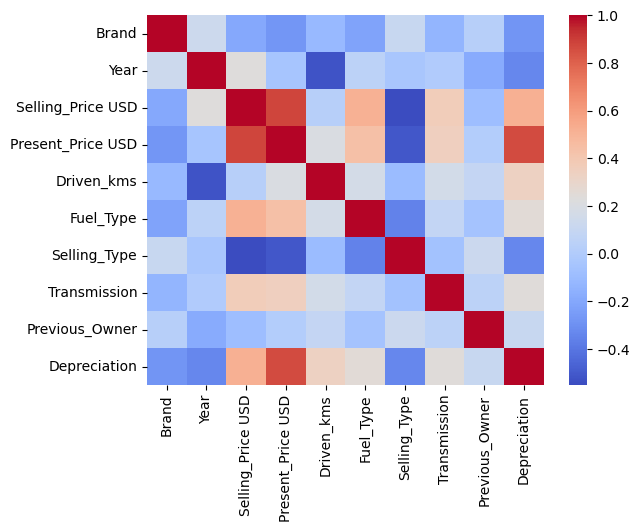

In [50]:
sns.heatmap(df3.corr(),cmap='coolwarm')

In [52]:
xdata=df3.drop({'Selling_Price USD','Present_Price USD'},axis=1)
ydata=df3['Selling_Price USD']

In [53]:
ydata.shape

(301,)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=0)

In [55]:
model=LinearRegression()

In [56]:
model.fit(x_train, y_train)

LinearRegression()

In [57]:
ypred=model.predict(x_test)

In [58]:
ypred

array([ 7382.99976993,  -894.17040742,  4225.25288785,  8575.02619066,
       12579.02462136,  4947.44936128,  3694.62351736,  1720.14729185,
        7321.80695926,  4516.23751481,  2730.94994846,  1852.71660819,
        5333.09276167,  8721.90286667,  9029.02181678, 10241.94252192,
        8567.97299993,  4410.47475268,  -863.51498369,  2360.19560647,
        6855.39658649,  3987.90527344,  8185.18771557,  5624.10627031,
       -2710.63145924,  2238.18315029, -1329.35575077,   729.09134751,
        -269.54080961,  9122.46085286,  4859.89540865,  7671.68104946,
         683.44981916,  7887.90775872,  3660.70240179,  1887.25297814,
        5158.96234976,  8525.12526234, -3423.66683502,  8931.09110069,
        9282.64190169, 17118.18759878,  4248.23440473,  4093.77456284,
        7724.33356642,  7890.60223776,    26.75839567,  1802.72645313,
        4870.2944816 ,  8139.54997283,  9119.07391099,  5326.37885073,
        4760.53413737, 16052.68039483,  1803.05053704,  1242.2568817 ,
      

In [59]:
#test 1

In [60]:
xdata.tail(1)

,Brand,Year,Driven_kms,Fuel_Type,Selling_Type,Transmission,Previous_Owner,Depreciation
300,9,2016,5464,0,0,0,0,600


In [105]:
print(model.predict(xdata.tail(1)))

[5006.29135669]


In [111]:
testdf=pd.DataFrame([[9,2020,85464,0,0,0,0,600]],columns=['Brand','Year','Driven_kms','Fuel_Type','Selling_Type','Transmission','Previous_Owner','Depreciation'])

In [113]:
model.predict(testdf)

array([6628.55910649])

In [64]:
r2_score(y_test,ypred)

0.7536083427731607

In [65]:
model.score(x_test,ypred)

1.0